In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
# plt.rcParams['svg.fonttype'] = 'none'

In [2]:
bc_nms = [
    "H3K4me3", 
    "H3K27ac", 
    "H3K27me3", "EZH2", "EED", "SUZ12", "AEBP2", 
    "MED12", "CycC", 
    "H3K27M",
    "EGFR", "HA-Tag"
]

In [3]:
def CalcPQFromUMICnts(raw_cnts):
    PQ_prop = []
    PQ_Ctrl_normed = []
    for i in range(len(raw_cnts)):
        PQ_prop.append([x / sum(raw_cnts[i]) for x in raw_cnts[i]])
        PQ_Ctrl_normed.append([x / (raw_cnts[i][7] + raw_cnts[i][8]) for x in raw_cnts[i]])

    PQ_prop_avg = []
    PQ_Ctrl_normed_avg = []
    for i in range(len(raw_cnts[0])):
        curr_col = [x[i] for x in PQ_prop]
        PQ_prop_avg.append(np.mean(curr_col))

        curr_norm_col = [x[i] for x in PQ_Ctrl_normed]
        PQ_Ctrl_normed_avg.append(np.mean(curr_norm_col))

    return PQ_prop, PQ_prop_avg, PQ_Ctrl_normed, PQ_Ctrl_normed_avg

In [4]:
# Numbers migrated from outputs of running PQSeq_Data_Analysis.py; see below for the annotation of samples

DMSO_PQ_raw = [
    [16760, 14502, 59883, 15501, 33086, 58871, 6142, 7918, 22061, 4056, 2927, 2471],
    [14938, 15241, 54914, 15172, 31436, 54205, 6708, 8748, 22133, 4826, 3545, 3478],
    [14804, 14885, 53621, 14755, 30579, 54905, 5996, 8146, 21854, 4275, 2829, 2539],
    [17247, 16791, 59178, 17617, 35959, 63251, 6611, 8983, 24986, 4518, 2893, 2537]
]


DMSO_PQ_prop, DMSO_PQ_avg, DMSO_PQ_ctrl_normed, DMSO_PQ_ctrl_normed_avg = CalcPQFromUMICnts(DMSO_PQ_raw)

Taz_PQ_raw = [
    [16069, 45777, 7683, 16104, 33655, 60338, 6767, 8226, 25117, 4520, 3967, 2540],
    [16967, 48197, 7805, 17031, 35414, 65187, 6862, 9510, 27641, 4765, 4117, 2554],
    [14768, 47130, 8136, 15324, 30406, 56978, 6735, 9319, 24414, 6384, 4314, 3354],
    [13435, 56779, 8806, 18113, 38809, 69163, 7793, 11339, 29988, 5230, 5472, 3662]
]

Taz_PQ_prop, Taz_PQ_avg, Taz_PQ_ctrl_normed, Taz_PQ_ctrl_normed_avg = CalcPQFromUMICnts(Taz_PQ_raw)

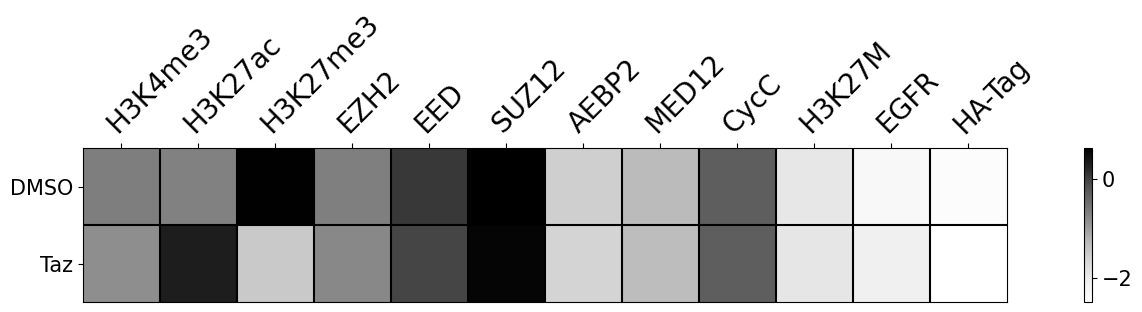

In [5]:
color_thres_num = 50
colors1 = plt.cm.Purples(np.linspace(0.2, 0.8, color_thres_num))
colors2 = plt.cm.Purples(np.linspace(0.8, 1, 256 - color_thres_num))
colors = np.vstack((colors1, colors2))
customized_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

plot_data = [np.log(DMSO_PQ_ctrl_normed_avg), np.log(Taz_PQ_ctrl_normed_avg)]
fig, ax = plt.subplots(figsize = (20, len(plot_data)))

plot_barcodes = bc_nms

im = ax.imshow(plot_data, cmap = "Greys")
cbar = fig.colorbar(im, ax = ax)
cbar.ax.tick_params(labelsize = 15)

ax.set_xticks(np.arange(len(plot_barcodes)))
ax.set_yticks([x for x in range(len(plot_data))])
ax.set_xticklabels(plot_barcodes, fontsize = 20)
ax.set_yticklabels(["DMSO", "Taz"], fontsize = 15)


ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(len(plot_barcodes) - 1):
    ax.plot([i + 0.5, i + 0.5], [-0.5, -0.5 + len(plot_data)], color = "black", lw = 1.5)

for i in range(len(plot_data) - 1):
    ax.plot([-0.5, -0.5 + len(plot_barcodes)], [i + 0.5, i + 0.5], color = "black", lw = 1.5)
# fig.savefig("DMSOTaz_PQ_logctrlnorm.svg", dpi = 1200)